**Частоты и их визуализации**

Меры, связанные с частотой, — это основа, позволяющая исследовать коллекции текстов с математической, компьютерной точки зрения.  

Основные виды частот:  
1) **абсолютная частота** — суммарное количество раз, сколько токен (слово) было употреблено в изучаемом тексте, корпусе, изучаемом отрывке текста и т.д. ( в зависимости от объекта изучения).  
2) **относительная частота** — результат определенного нормализации абсолютной частоты. Есть разные методы, но наиболее популярные — подсчёт процента (т.е. доли конкретного токена от всех токенов в тексте) и instances per million (ipm; количество повторений на миллион токенов).

Самое простое употребление частоты в связи с текстом, который может представить любой человек, — это частотные списки. Например, один из самых знаменитых частотников для русского языка — "Новый частотный словарь русской лексики" О. Н. Ляшевской и С. А. Шарова основан на репрезентативной выборке и доступен онлайн: http://dict.ruslang.ru/freq.php

Частотный словарь конкретного текста или конкретного корпуса — в каком-то смысле это простая модель этого текста (и шире — модель языка), представляющая этот текст или корпус в общем виде, позволяющаяся реконструировать разные особенности текста. Позже мы поговорим о более сложных моделях (мешок слов, tf-idf), но сейчас сосредеточимся на простых **частотных списках**. Частотные списки — это списки уникальных слов с указанием абсолютной частоты, зачастую отсортированные по этой частоте.

Частотные списки можно собирать вручную:

In [ ]:
text = 'Мой дядя самых честных правил, Когда не в шутку занемог, Он уважать себя заставил И лучше выдумать не мог. Его пример другим наука; Но, боже мой, какая скука С больным сидеть и день и ночь, Не отходя ни шагу прочь! Какое низкое коварство Полуживого забавлять, Ему подушки поправлять, Печально подносить лекарство, Вздыхать и думать про себя: Когда же чёрт возьмёт тебя?'
print(text) #1 строфа "Евгения Онегина"

Общее число слов получить просто, например, разбив строку с помощью метода split() и подсчитав длину полученного списка:

In [ ]:
print(len(text.split()))

Либо с помощью той же функции len(), но примененной к результату токенизации.

In [ ]:
import nltk
from nltk import word_tokenize

Посмотрим на словник (т.е. набор уникальных токенов) строфы:

In [ ]:
nltk.download('punkt_tab')

In [ ]:
words = nltk.tokenize.word_tokenize(text.lower()) #приведем на всякий случай к нижнему регистру, чтобы слова с заглавной буквы не посчитались отдельно
print(len(words)) #количество токенов вообще
print(set(words)) #распечатка словника
print(len(set(words))) #количество уникальных токенов (включая пунктуацию: как вы помните, они по определению тоже токены)

Посчитаем количество повторов каждого из токенов, сохранив их в словарь (самый удобный способ хранить частотники):

In [ ]:
word_frequency = {} #пустой словарь, куда мы запишем каждое слово (ключ) и количество этих слов (значение)
for token in words: #инициируем цикл, который пройдется по каждому слову в списке токенов текста
    if token in word_frequency: #если слово уже есть в словаре word_frequency, то оно увеличит его значение на 1
        word_frequency[token] += 1
    else: #если же оно встречается в первый раз, то цикл назначит ему значение 1 (что логично, слово встретилось в первый раз)
        word_frequency[token] = 1

print(word_frequency)

**Задание 1.** Напишите код, который посчитает частоты по абзацу текста на ваш выбор.

In [ ]:
#ваш код здесь
text = ''

Что делать, если текстов у нас несколько? Всё не так сложно, нам просто понадобится вложенный цикл (если вы не обсудили на курсе по питону или не до конца поняли, то здесь есть качественное объяснение — https://education.yandex.ru/handbook/python/article/vlozhennye-cikly):

In [ ]:
onegin_one_two = ['Мой дядя самых честных правил, Когда не в шутку занемог, Он уважать себя заставил И лучше выдумать не мог. Его пример другим наука; Но, боже мой, какая скука С больным сидеть и день и ночь, Не отходя ни шагу прочь! Какое низкое коварство Полуживого забавлять, Ему подушки поправлять, Печально подносить лекарство, Вздыхать и думать про себя: Когда же чёрт возьмёт тебя?', 'Увы, на разные забавы Я много жизни погубил! Но если б не страдали нравы, Я балы б до сих пор любил. Люблю я бешеную младость, И тесноту, и блеск, и радость, И дам обдуманный наряд; Люблю их ножки; только вряд Найдете вы в России целой Три пары стройных женских ног. Ах! долго я забыть не мог Две ножки... Грустный, охладелый, Я всё их помню, и во сне Они тревожат сердце мне.']
print(len(onegin_one_two))
print(onegin_one_two)

In [ ]:
word_frequency_onegin = {} #создадим словарь, в котором сохраним все частоты
for strophe in onegin_one_two: #добавим цикл, который пройдет по каждой строфе
    for token in word_tokenize(strophe.lower()):
        if token in word_frequency_onegin:
            word_frequency_onegin[token] += 1
        else:
            word_frequency_onegin[token] = 1

print(word_frequency_onegin)

Проверка частоты конкретного слова:

In [ ]:
print(word_frequency_onegin['мой'])

Как посчитать **относительную частоту**? Нужно поделить частоту конкретного токена на общее количество слов в тексте.

In [ ]:
def word_absolute_freq(text, word): #создадим функцию, которая будет считать абсолютную частоту в тексте
  word_frequency_text = {}
  words = word_tokenize(text.lower())
  for token in words: #инициируем цикл, который пройдется по каждому слову в списке токенов текста
    if token in word_frequency_text: #если слово уже есть в словаре word_frequency, то оно увеличит его значение на 1
        word_frequency_text[token] += 1
    else: #если же оно встречается в первый раз, то цикл назначит ему значение 1 (что логично, слово встретилось в первый раз)
        word_frequency_text[token] = 1
  return word_frequency_text[str(word)]

print(word_absolute_freq('I love cats and dogs, but not all of the dogs', 'dogs'))

In [ ]:
print(word_absolute_freq(input(), input()))

Получив частоту токена, дело за малым: поделить его на общее число слов в тексте.

In [ ]:
text = 'Мой дядя самых честных правил, Когда не в шутку занемог, Он уважать себя заставил И лучше выдумать не мог. Его пример другим наука; Но, боже мой, какая скука С больным сидеть и день и ночь, Не отходя ни шагу прочь! Какое низкое коварство Полуживого забавлять, Ему подушки поправлять, Печально подносить лекарство, Вздыхать и думать про себя: Когда же чёрт возьмёт тебя?'
print(word_absolute_freq(text, 'дядя') / len(text.split()) * 1000000)  


**Задание 2.** Модернизируйте функцию word_relative_freq так, чтобы она возвращала относительную частоту слова.

В библиотеке **nltk** также есть встроенные инструменты для работы с частотными списками. Самый популярный и распространённый - это функция **FreqDist()**, создающая частотный словарь, подобный тому, что мы с вами делали выше.

In [ ]:
text = 'Мой дядя самых честных правил, Когда не в шутку занемог, Он уважать себя заставил И лучше выдумать не мог. Его пример другим наука; Но, боже мой, какая скука С больным сидеть и день и ночь, Не отходя ни шагу прочь! Какое низкое коварство Полуживого забавлять, Ему подушки поправлять, Печально подносить лекарство, Вздыхать и думать про себя: Когда же чёрт возьмёт тебя?'
print(text) #1 строфа "Евгения Онегина"

Для начала нужно так же, как и ранее, токенизировать текст, а затем применить к списку токенов функцию **FreqDist()**.

In [ ]:
from nltk.probability import FreqDist

In [ ]:
text_tokens = word_tokenize(text.lower())
word_frequencies = FreqDist(text_tokens)
print(word_frequencies) #это особый объект (класс), в котором хранятся наши подсчеты

К этому классу применимы разные приятные методы. Более полный список вы можете изучить здесь: https://tedboy.github.io/nlps/generated/generated/nltk.ConditionalFreqDist.html#methods.
Рассмотрим некоторые из них.

Если вы хотите получить итерируемый список токенов и частот, то пригодится метод **items()**:

In [ ]:
print(word_frequencies.items())

In [ ]:
for token, frequency in word_frequencies.items(): #так как это список с кортежами, мы можем итерироваться по обеим записям в кортеже
  print(token, frequency)

Например, этим можно воспользоваться, если мы хотим отсортировать слова с частотой больше 35.

In [ ]:
frequent_tokens = []
for token, frequency in word_frequencies.items(): #так как это список с кортежами, мы можем итерироваться по обеим записям в кортеже
  if frequency >= 2:
    frequent_tokens.append((token, frequency))
  #  print('Ура!')
#else:
   # print('Увы!')

print(frequent_tokens)

Визуализация графика распределения:

In [ ]:
word_frequencies.plot(title='Распределение слов в 1 строфе')

Вывод топовых частот:

In [ ]:
word_frequencies.most_common(5)

И получить **гапаксы** (т.е. слова, встретившиеся всего один раз).

In [ ]:
word_frequencies.hapaxes()

Немного исследуем реальные данные: это письма Ф. М. Достоевского.

In [ ]:
path = 'C:\\Users\\Aleksandr\\DostoyevskiEpistola.txt'
with open(path, encoding='utf-8') as txt:
  text = txt.read()
  tokens_count = len(text.split()) #используем наивную токенизацию для быстроты
  unique_tokens = len(set(text.split())) #уникальные токены
  print(tokens_count)
  print(unique_tokens)

Существует крайне эффективная метрика, измеряющая лексическое разнообразие текста - **type-token ratio**.  
Type-token ratio (TTR) — это метрика лексической разнообразия текста. Она показывает отношение количества уникальных слов (types) к общему количеству слов (tokens) в тексте. Его значение от 0 до 1, чем ближе значение к единице, тем более разнообразную лексику автор использует в тексте.  
NB! Простой TTR уязвим к длине текстов; в более длинных текстах он более низкий всегда, поэтому сравнивать простым TTR лучше тексты одной длины. Для разноразмерных текстов есть более хитрые подходы, например, из библиотеки https://pypi.org/project/lexical-diversity/.  

In [ ]:
ttr = unique_tokens / tokens_count
print(ttr)

**Вопрос.** Будет ли заметно отличаться TTR в текстах "Идиота" на русском и английском языке? Допустим, что длина текста одинаковая (в токенах).

**Задание 3.** Напишите такой код, который будет принимать список из двух текстов (пока что коротких). Этот код должен раздельно посчитать TTR каждого из текстов и сохранить их в отдельный список.

Итак, в нашем наборе данных всего 338400 токенов и из них 61376 уникальных. Отличное поле экспериментов!  

Давайте сделаем небольшой процепроцессинг и более качественно подготовим данные.

In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords
import re
stopwords_ru = stopwords.words('russian')

In [ ]:
path = 'C:\\Users\\Aleksandr\\DostoyevskiEpistola.txt'
with open(path, encoding='utf-8') as txt:
  text = txt.read()
  text = re.sub('[^а-яА-ЯёЁ -]', '', text.lower())
  text_no_stop = ' '.join([token for token in word_tokenize(text) if token not in stopwords_ru])
  #в последней строчке мы применили так называемый list comprehension: https://www.w3schools.com/python/python_lists_comprehension.asp
  #это краткая запись цикла, проходящего по некоторому множеству, который сохраняет элементы через append по какому-то условию

In [ ]:
print(len(text_no_stop.split())) #количество токенов после очистки от стоп-слов

Наконец мы можем составить частотный словарь:

In [ ]:
text_tokens = word_tokenize(text_no_stop)
word_frequencies = FreqDist(text_tokens)
word_frequencies = dict(sorted(word_frequencies.items(), key=lambda item: item[1], reverse=True)) #отсортируем список по значению ключа

In [ ]:
word_frequencies['это']

Если мы хотим получить срез по частотнику и нам не так важен тип словаря (например, для поиска по ключу), то можно обойтись без возвращение в словарь. Тогда мы сможем получить топы частот без излишних проблем:

In [ ]:
lst = sorted(word_frequencies.items(), key=lambda item: item[1], reverse=True)
lst[:10]

Здесь мы применили лямбда-функцию. Подробнее о них можно повторить здесь: https://www.w3schools.com/python/python_lambda.asp

Аналогичный подход из nltk:

In [ ]:
word_frequencies.most_common(50)

Визуализируем этот топ слов в письмах Достоевского:

In [ ]:
word_frequencies.plot(150, title='Распределение слов в письмах Достоевского') #сначала указывается количество помещаемых слов на график
#в случае большого корпуса стоит указывать не слишком большое значение, иначе график будет отрисовываться вечно

**Задание 4.** Напишите такой код, который:  
1) откроет файл с романом "Идиот";  
2) сделает простую предобработку;  
3) посчитает, сколько токенов всего в романе и сколько в нем уникальных токенов;  
4) посчитает относительную долю каждого из топ-10 слов в тексте;
5) посчитает TTR романа.

x - число употреблений всех слов в тексте
z - число употреблений искомого слова
y = z / x * 1000000

**Частоты и Ципф.**

В текстах естественного языка наблюдается явление, которое называется ***законом Ципфа***.

Закон Ципфа — это эмпирический закон в лингвистике, описывающий частоту встречаемости слов в больших текстах (корпусах). Он утверждает, что частота  *f*  слова обратно пропорциональна его рангу *r* в списке слов, отсортированном по частоте встречаемости.  
f ≈ k / r  
Самое частотное слово (r=1) встречается примерно в k раз.  
Второе по частоте слово (r=2) встречается примерно в k/2 раз.  
Третье по частоте слово (r=3) встречается примерно в k/3 раз, и так далее.  

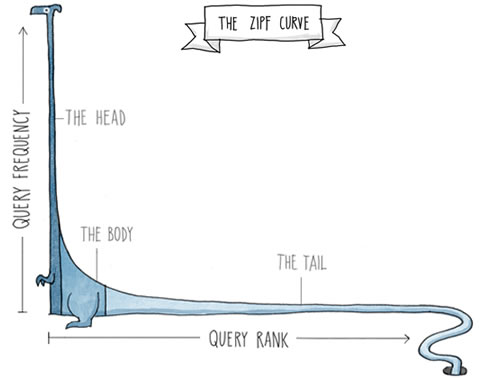

**Задание 5**. Визуализируйте топ-100 частот в "Идиоте". Похожи ли они на график, соответствующий закону Ципфа?

**Облако слов.**

Ещё одним визуальным инструментом работы с частотами является визуализация с помощью облаков слов.  
Это визуальное представление частот, где размер слова пропорционален частоте слов. Это позволяет быстро и наглядно визуально оценить ключевые слова или представлять такие данные.  

При этом, конечно, облака слов (почти) не учитывают контекст и зависят от длины текста.

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110).generate(text_no_stop)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Немного украсим:

In [ ]:
wordcloud = WordCloud(background_color='white', colormap = 'inferno_r', width=800, height=400, random_state=21, max_font_size=110).generate(text_no_stop)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Документация библиотеки здесь: https://amueller.github.io/word_cloud/

Список расцветок для слов:

In [ ]:
colormap = ['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'winter', 'winter_r']
print(colormap)

**Задание 6**. Нарисуйте облако слов для "Идиота", предварительно удалив стоп-слова.